In [1]:
pip install pandas scikit-learn imblearn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 2.4 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.0 MB 3.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 3.7 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 4.1 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 4.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 4.1 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 4.0 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.0 MB 3.7 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.0 MB 3.6 MB/s eta 0:00:02
   --------------------------- ---


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd

In [102]:
df = pd.read_csv("Churn.csv")

In [103]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [105]:
df.duplicated().sum()

np.int64(0)

In [106]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [107]:
X = df.drop(columns=['Exited','CustomerId'], axis=1)
y = df['Exited']

In [108]:
X.Gender.replace(to_replace='Female', value=0, inplace=True)
X.Gender.replace(to_replace='Male', value=1, inplace=True)


C:\Users\nehab\AppData\Local\Temp\ipykernel_3188\3702337260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.Gender.replace(to_replace='Female', value=0, inplace=True)
C:\Users\nehab\AppData\Local\Temp\ipykernel_3188\3702337260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [109]:
X.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88
1,2,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,3,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57
3,4,Boni,699,France,0,39,1,0.00,2,0,0,93826.63
4,5,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [110]:
X.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<Axes: >

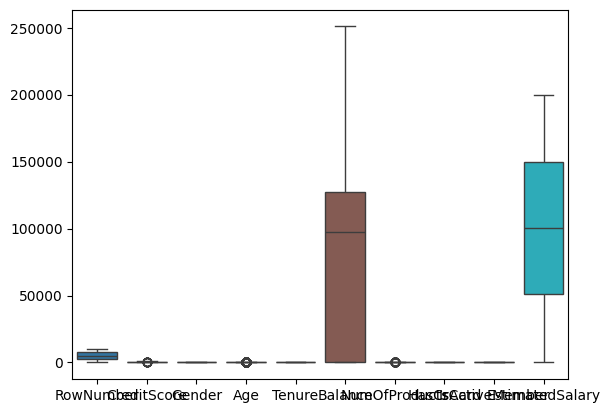

In [71]:
sns.boxplot(X)

In [111]:
X = pd.get_dummies(x, drop_first=True).copy()

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
sm = SMOTE()
X, y = sm.fit_resample(X, y)

In [114]:
y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [115]:
X.describe()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000
mean,4965.141467,649.034158,0.412282,40.999121,4.804094,82099.823432,1.419691,0.625204,0.371217,100507.500231
std,2780.477232,91.905650,0.492261,9.988225,2.722114,61385.089132,0.571032,0.484085,0.483145,57689.150330
min,1.000000,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,2572.000000,586.000000,0.000000,34.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51100.481707
50%,4933.000000,650.000000,0.000000,40.000000,5.000000,103105.070606,1.000000,1.000000,0.000000,100566.515685
75%,7360.750000,712.000000,1.000000,47.000000,7.000000,129553.705348,2.000000,1.000000,1.000000,150664.788682
max,10000.000000,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [116]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
import seaborn as sns

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [150]:
from sklearn.naive_bayes import GaussianNB

In [151]:
model = GaussianNB()

In [152]:
model.fit(X_train, y_train)

GaussianNB()

In [153]:
pred = model.predict(X_test)

c:\Users\nehab\OneDrive\Desktop\New folder\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [154]:
from sklearn.metrics import accuracy_score

In [155]:
accuracy_score(y_test, pred)

0.5043942247332078

In [156]:
import pickle

In [157]:
file_path = "NB_model.pkl"

In [158]:
with open(file_path, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved successfully to {file_path}")

Model saved successfully to NB_model.pkl


In [159]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [160]:
x.columns

Index(['RowNumber', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       ...
       'Surname_Zotov', 'Surname_Zotova', 'Surname_Zox', 'Surname_Zubarev',
       'Surname_Zubareva', 'Surname_Zuev', 'Surname_Zuyev', 'Surname_Zuyeva',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object', length=2943)